In [1]:
import os
import numpy as np
import pathlib

import pandas as pd

In [2]:
# get the link of the train data
path = "https://raw.githubusercontent.com/chathurawimalasiri/predicting-house-prices/main/code/kc_house_data.csv?token=GHSAT0AAAAAAB6MPORVYK3YBLJXHCTPFIGKZCRU5DA"
#https://raw.githubusercontent.com/chathurawimalasiri/predicting-house-prices/main/code/trainData.csv

In [3]:
# open the data file
df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check the shape of the house
df.shape

(21613, 21)

In [5]:
# Get the information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# summary 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# check the null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Data Preprocessing

# Data visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-9c1d299bb300>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

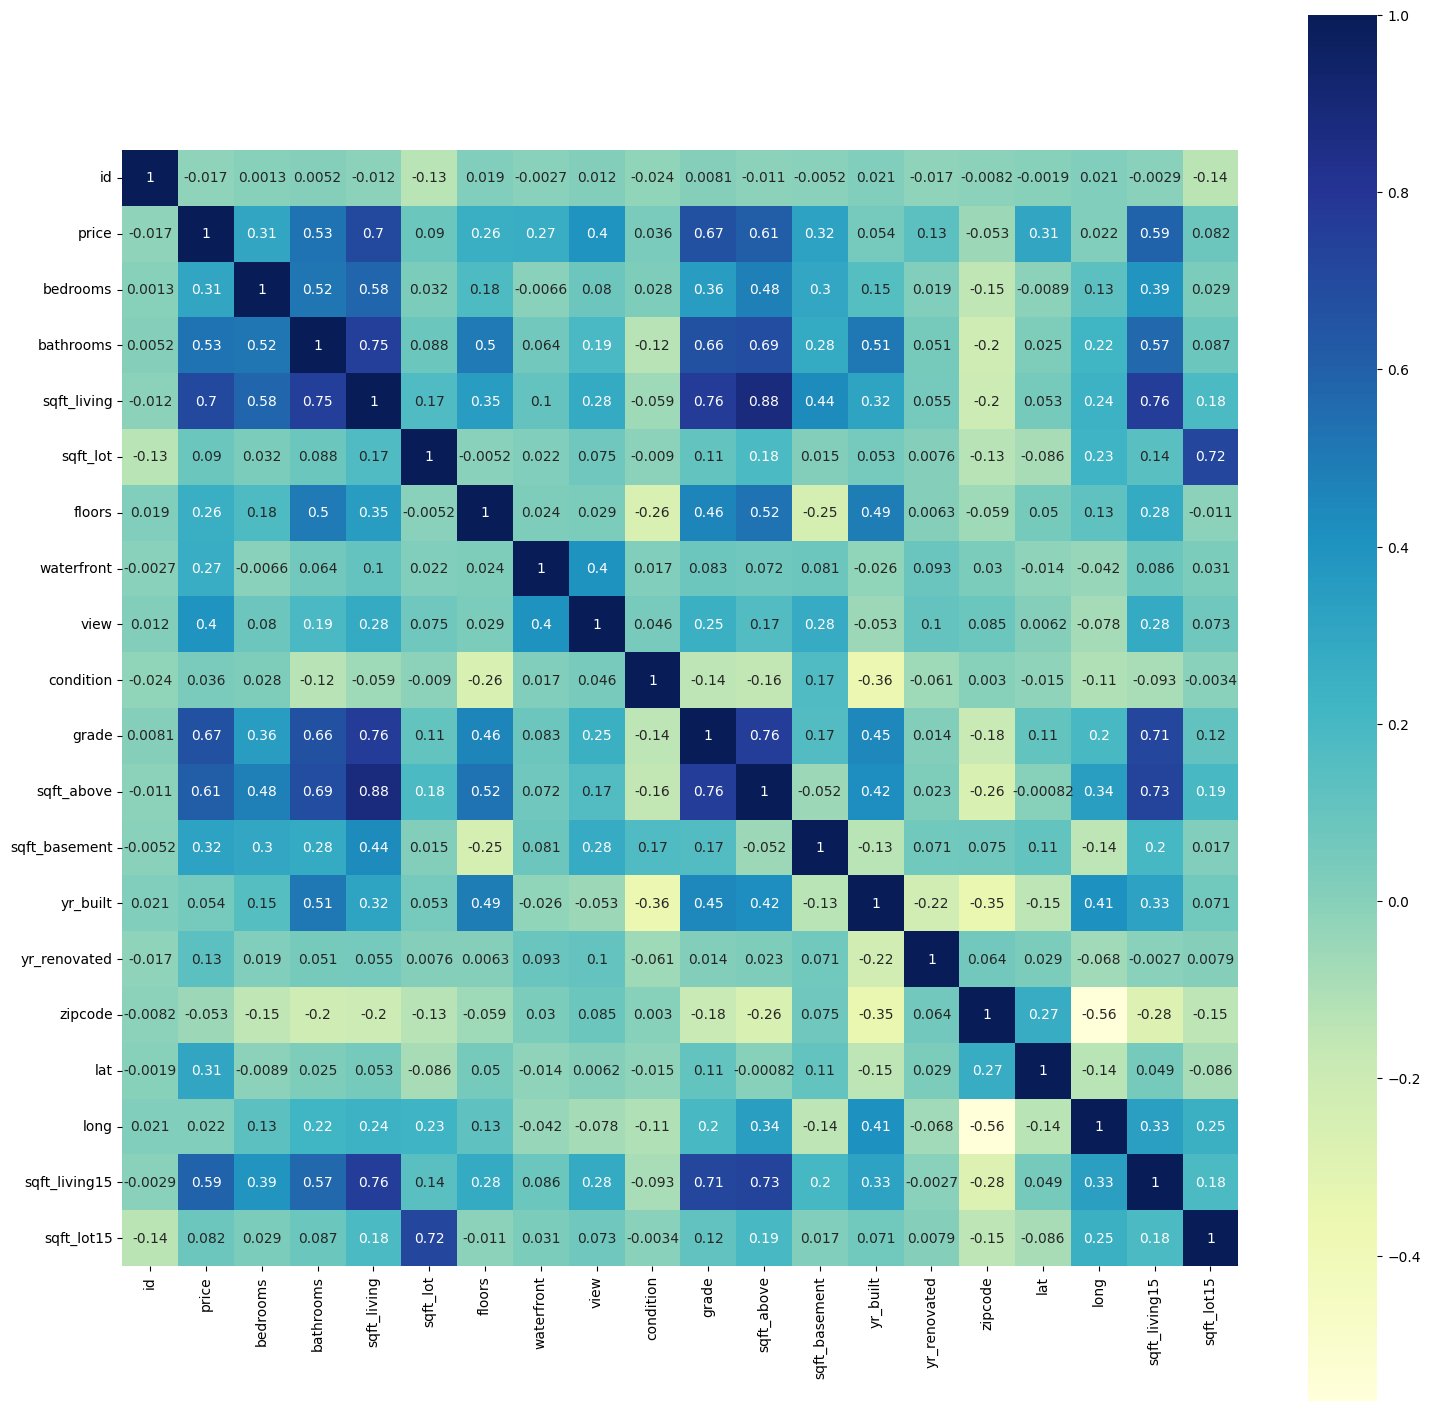

In [9]:
# Correlation amongst numeric attributes
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= 'YlGnBu',annot=True, square=True)

In [10]:
# check which features more correlated to the price

price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)



price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<ipython-input-10-6968c18cb940>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = df.corr()['price'].sort_values(ascending=False)


In [11]:
# #check the price distribution 
# f, axes = plt.subplots(1, 1,figsize=(10,5))
# sns.distplot(df['price'], ax=axes)
# axes.set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')

<Axes: xlabel='price', ylabel='bathrooms'>

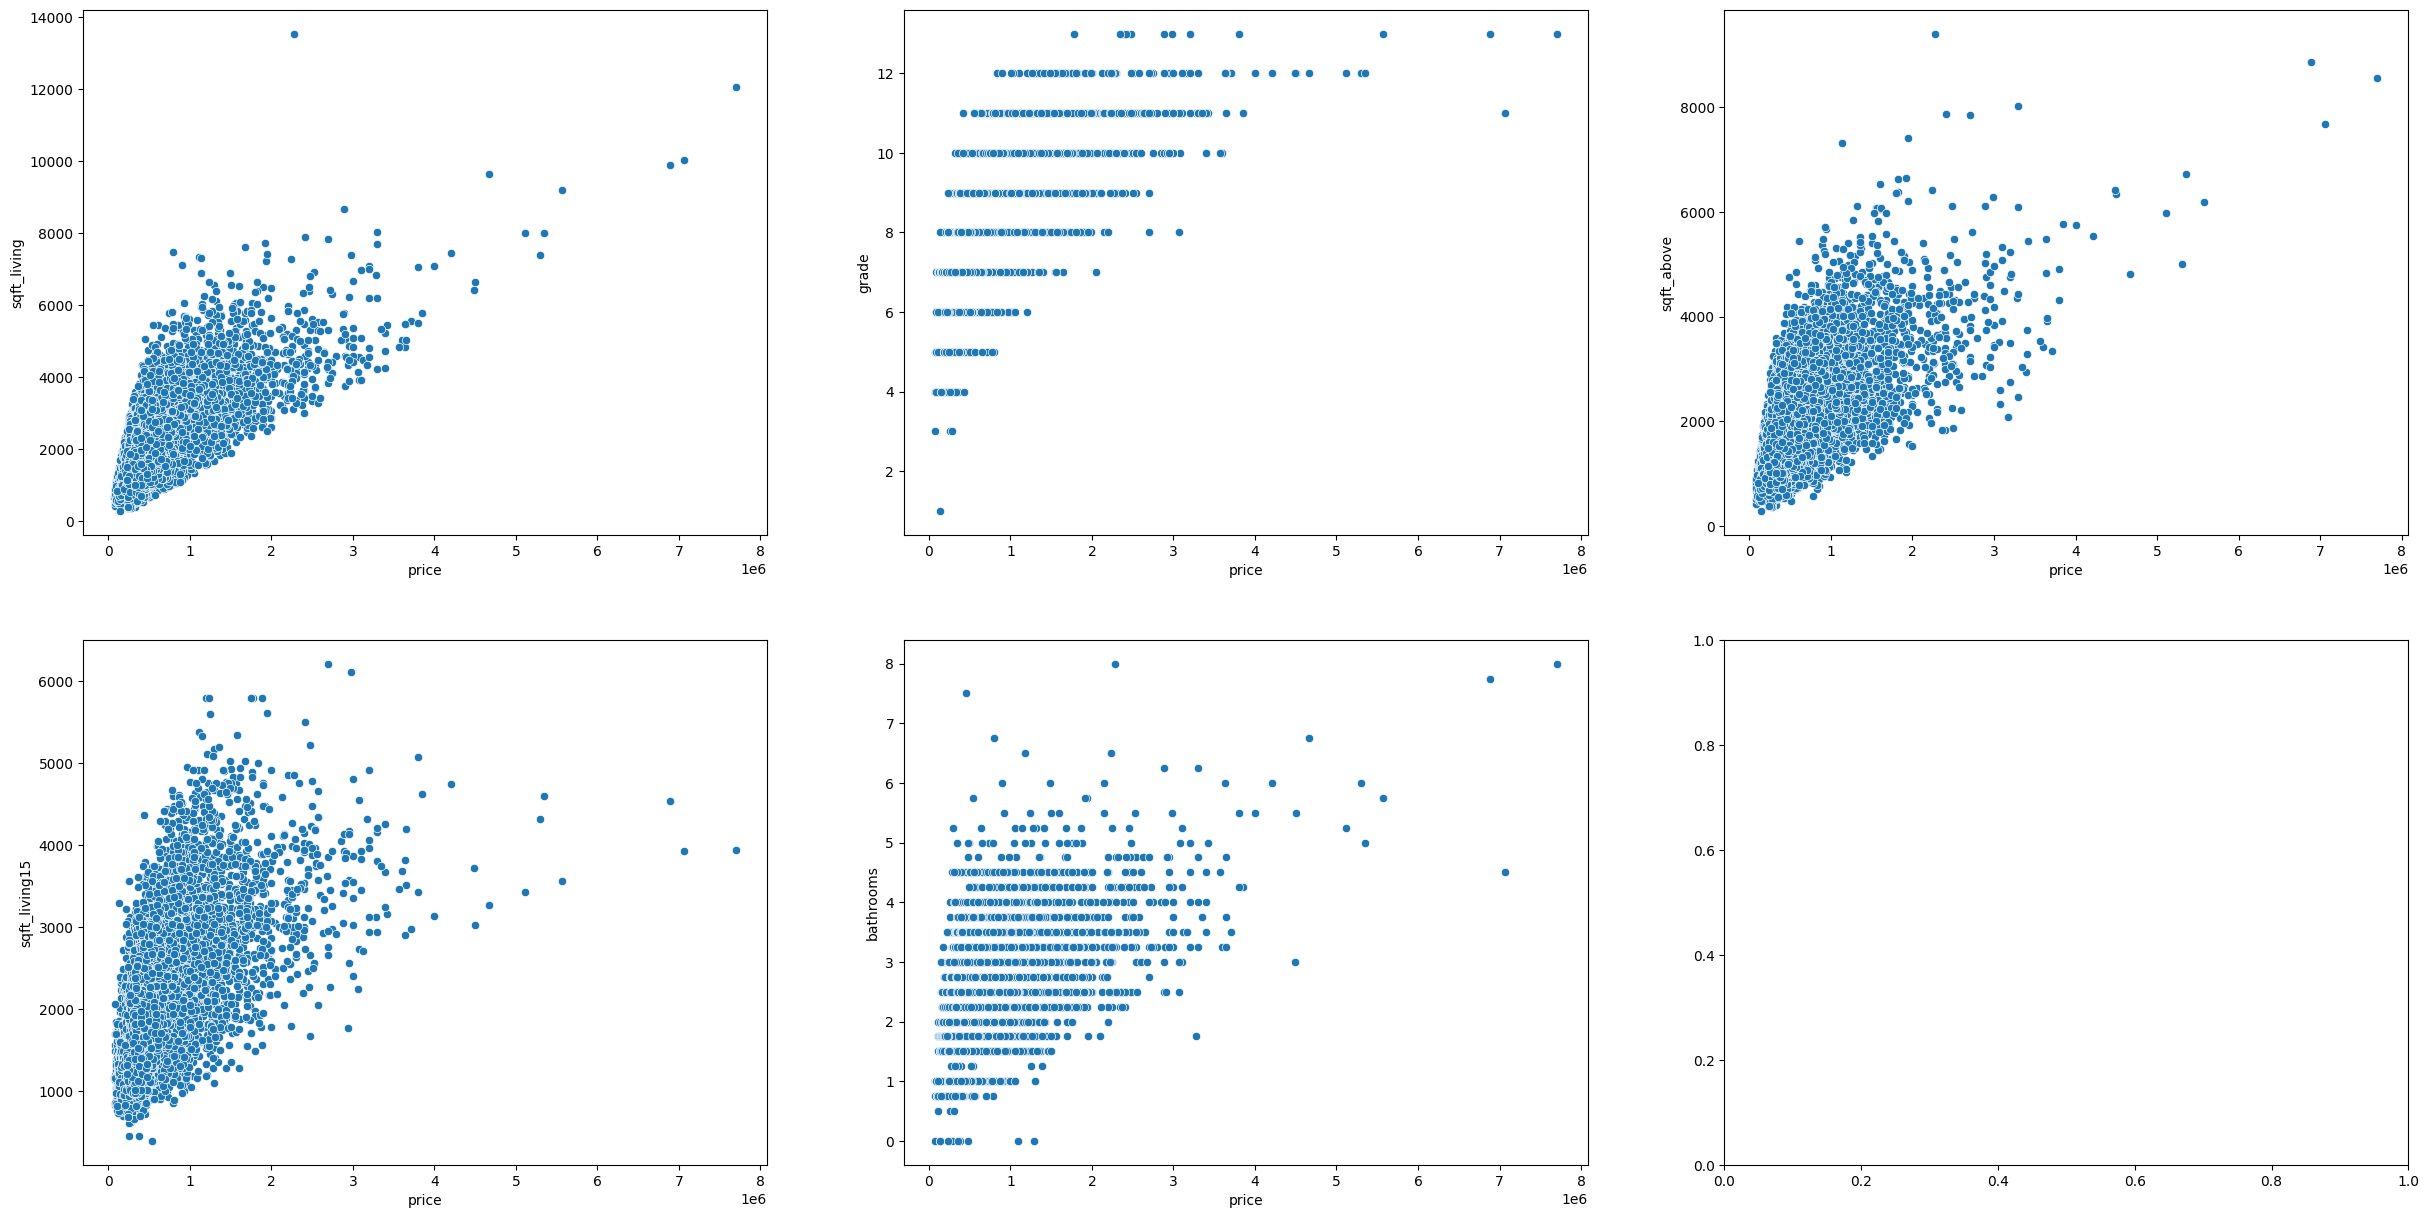

In [12]:
# # according to the results sqft_living, grade, sqft_above, sqft_living15, bathrooms are more correlated to the price of the house  

f, axes = plt.subplots(2, 3,figsize=(30,15))
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[0][0])
sns.scatterplot(x='price',y='grade', data=df, ax=axes[0][1])
sns.scatterplot(x='price',y='sqft_above', data=df, ax=axes[0][2])
sns.scatterplot(x='price',y='sqft_living15', data=df, ax=axes[1][0])
sns.scatterplot(x='price',y='bathrooms', data=df, ax=axes[1][1])

<Axes: xlabel='bathrooms', ylabel='price'>

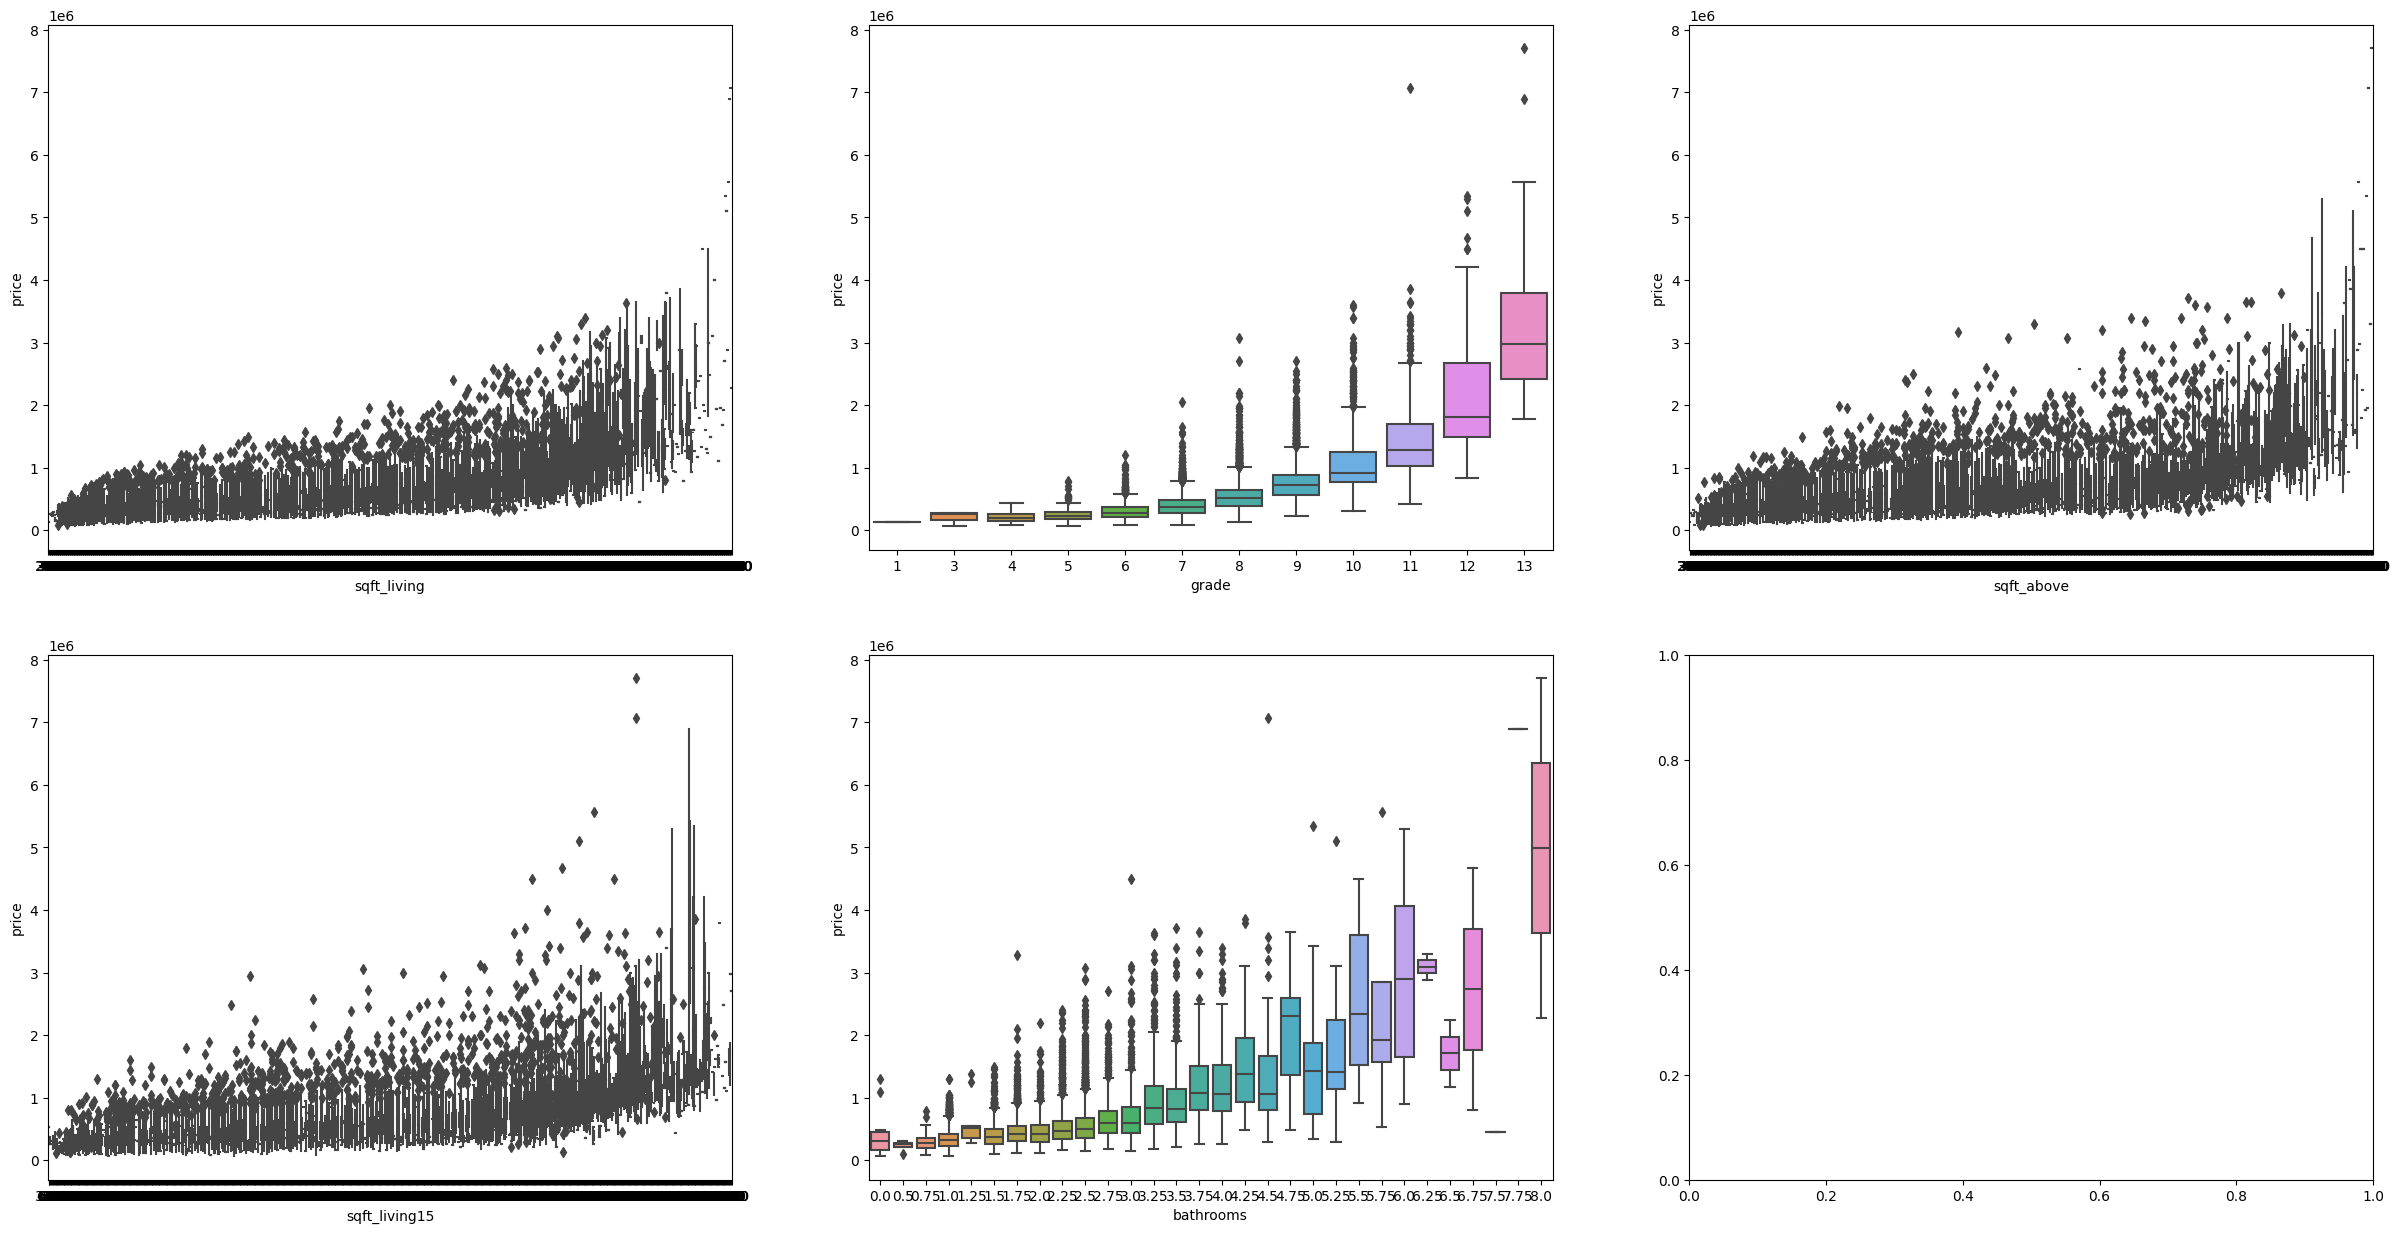

In [13]:
# check the box plot of each features that are more correlated


f, axes = plt.subplots(2, 3,figsize=(30,15))
sns.boxplot(x=df['sqft_living'],y=df['price'], ax=axes[0][0])
sns.boxplot(x=df['grade'],y=df['price'], ax=axes[0][1])
sns.boxplot(x=df['sqft_above'],y=df['price'], ax=axes[0][2])
sns.boxplot(x=df['sqft_living15'],y=df['price'], ax=axes[1][0])
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axes[1][1])





In [14]:
# # rename the column 'old_name' to 'new_name'
# df = df.rename(columns={'date': 'date_'})

df['date_']=pd.to_datetime(df['date'])

df['month'] = df['date_'].apply(lambda date:date.month)
df['year'] = df['date_'].apply(lambda date:date.year)

df = df.drop(['date_','date'],axis=1)

# # Check the new columns
print(df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [15]:
from sklearn.model_selection import train_test_split

# I divided my data into 3 categories that are tarin, test and validations

Y = df['price']
X = df.drop(['id','price','zipcode'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(X.columns)


(15561, 19)
(4323, 19)
(1729, 19)
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')


In [16]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Linear Regression

In [17]:
# # 1. use Logistic Regression

# from sklearn.linear_model import LinearRegression 
# # Instantiate a LogisticRegression classifier with default parameter values
# logisticregression = LinearRegression()

# # Fit logreg to the train set
# logisticregression.fit(X_train, y_train)

# ANN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.regularizers import l2

hidden_units1 = 19
hidden_units2 = 19
hidden_units3 = 19
learning_rate = 0.01

# regularization hyperparameters
l2_lambda = 0.01
dropout_rate = 0.1

# build the model with regularization
model = Sequential([
  Dense(hidden_units1, activation='relu'),

 # Dropout(dropout_rate),
  Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
 # Dropout(dropout_rate),
  Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
 # Dropout(dropout_rate),
  Dense(hidden_units3, kernel_initializer='normal', activation='relu'),

  Dense(1,activation='relu')
])

msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

In [19]:
# train the model
history = model.fit(x=X_train,y=y_train.values,
          validation_data=(X_val,y_val.values),
          batch_size=32,epochs=100)

Epoch 1/100
487/487 [==============================] - 8s 4ms/step - loss: 12.2957 - mean_squared_logarithmic_error: 12.2777 - val_loss: 0.1938 - val_mean_squared_logarithmic_error: 0.1991
Epoch 2/100
487/487 [==============================] - 2s 5ms/step - loss: 0.1846 - mean_squared_logarithmic_error: 0.1846 - val_loss: 0.1793 - val_mean_squared_logarithmic_error: 0.1828
Epoch 3/100
487/487 [==============================] - 2s 4ms/step - loss: 0.1793 - mean_squared_logarithmic_error: 0.1792 - val_loss: 0.1747 - val_mean_squared_logarithmic_error: 0.1783
Epoch 4/100
487/487 [==============================] - 2s 4ms/step - loss: 0.1734 - mean_squared_logarithmic_error: 0.1733 - val_loss: 0.1688 - val_mean_squared_logarithmic_error: 0.1725
Epoch 5/100
487/487 [==============================] - 2s 4ms/step - loss: 0.1662 - mean_squared_logarithmic_error: 0.1663 - val_loss: 0.1624 - val_mean_squared_logarithmic_error: 0.1665
Epoch 6/100
487/487 [==============================] - 2s 3ms/s

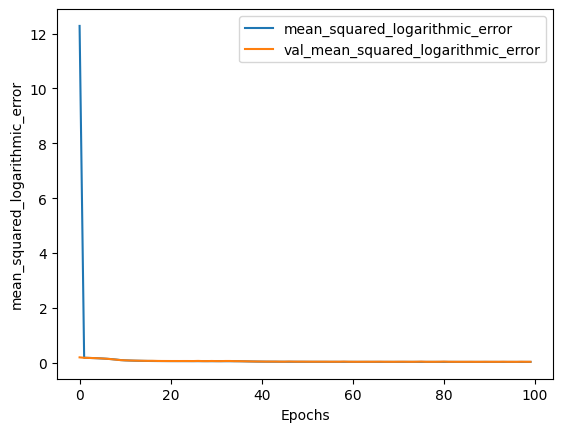

In [20]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')


136/136 [==============================] - 0s 1ms/step
Mean Squared Logarithmic Error (MSLE):  0.03415755684663089


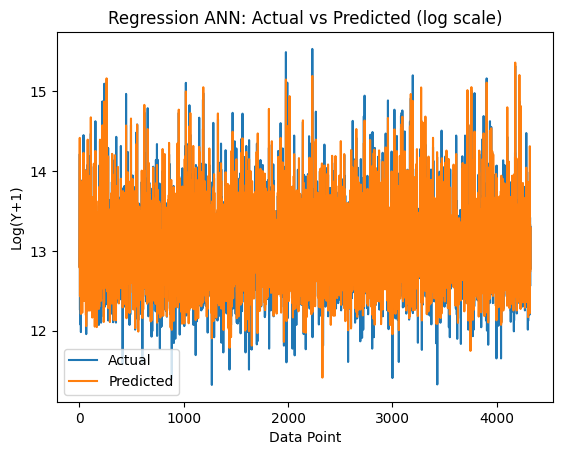

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

# assuming you have already trained and evaluated your regression ANN model
# and have obtained the predicted y values (y_pred) for X_test

# calculate MSLE
y_pred = model.predict(X_test)
msle = mean_squared_log_error(y_test, y_pred)

# print MSLE
print("Mean Squared Logarithmic Error (MSLE): ", msle)

# plot MSLE
plt.plot(np.arange(len(y_test)), np.log(y_test+1), label='Actual')
plt.plot(np.arange(len(y_pred)), np.log(y_pred+1), label='Predicted')
plt.legend()
plt.xlabel('Data Point')
plt.ylabel('Log(Y+1)')
plt.title('Regression ANN: Actual vs Predicted (log scale)')
plt.show()


136/136 [==============================] - 0s 1ms/step


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

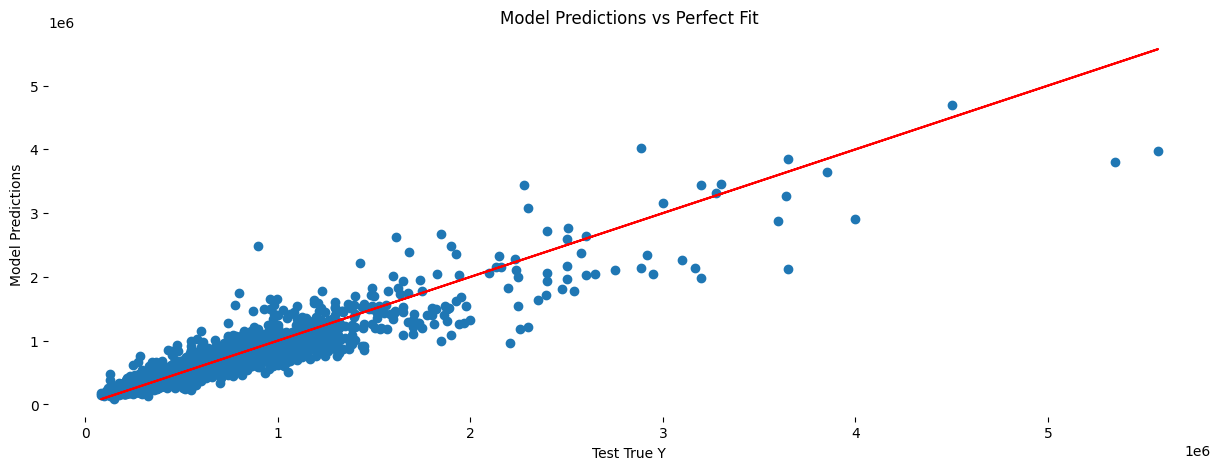

In [22]:
predictions = model.predict(X_test)

f, axes = plt.subplots(1, 1,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

sns.despine(left=True, bottom=True)
axes.set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

# Save the Model

In [23]:
from keras.models import load_model

# define and train your model here

# save the model
model.save('predicting_house_prices.h5')
